## Import necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting

## Load the Data 

In [41]:
# Load data into a dataframe 
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


For each column detail meaning, can be found in [this document](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf).

We define our target score as a ranking with 1 stands for the worst energy efficiency and 100 is the best.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

# Data Convertion

We need to convert object data type to float, so it can be processing and trained. We also need to replace 'Not Avaiable' with Nan. Convert all columns into numeric datatypes. 

In [43]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [44]:
# Statistics for each column
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


## Missing Values

Look at the percentage of missing values in each column, the function can be found in [Stack Overflow forum](https://stackoverflow.com/a/39734251)! 

In [45]:
# Function to calculate missing values by column
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [46]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


For column that has a high percentage of missing values, it would be not useful. We will remove any columns with more than 50% missing. 

In [47]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [48]:
    # Drop the columns
data = data.drop(columns = list(missing_columns))

The rest of the missing values will filled using an appropriate method afterwards/

# Data Visualization and Analysis



## Single Variable Plots

Text(0.5, 1.0, 'Energy Star Score Distribution')

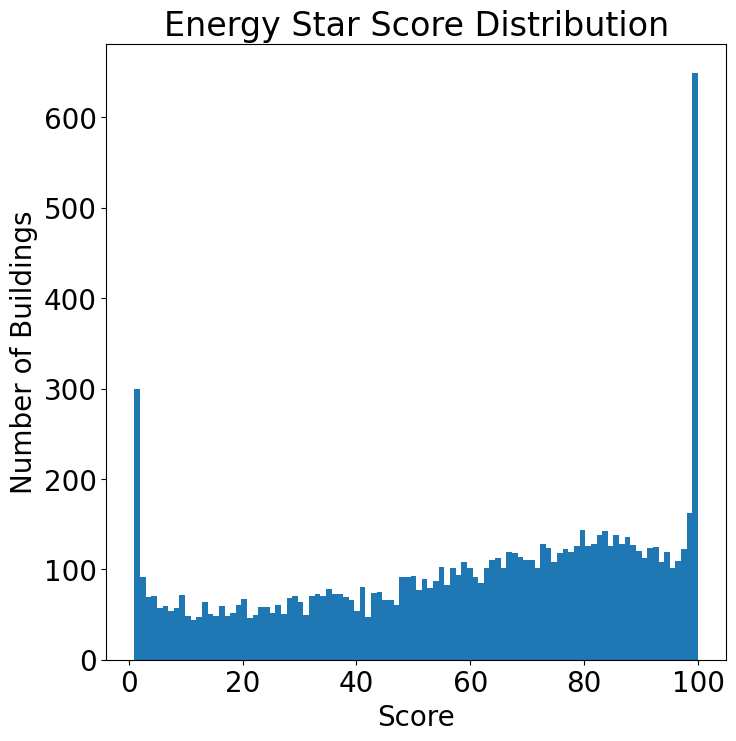

In [49]:
figsize(8, 8)

data = data.rename(columns = {'ENERGY STAR Score': 'score'})
plt.hist(data['score'].dropna(), bins = 100)
plt.xlabel('Score'); plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

From the plot, we can see that the distribution is weird, because 1 and 100 has a very high proporation. 
With futher research and data exploration, we find that the score is reported by the owner themselves! So they may report not based on the usage, but the best. And maybe a lot of them think 1 is the highest number... But with research, we figure that use EUI (Energy Use Intensity) will make more sense, because it is the total energy use / the square footage of the building.

Text(0.5, 1.0, 'Site EUI Distribution')

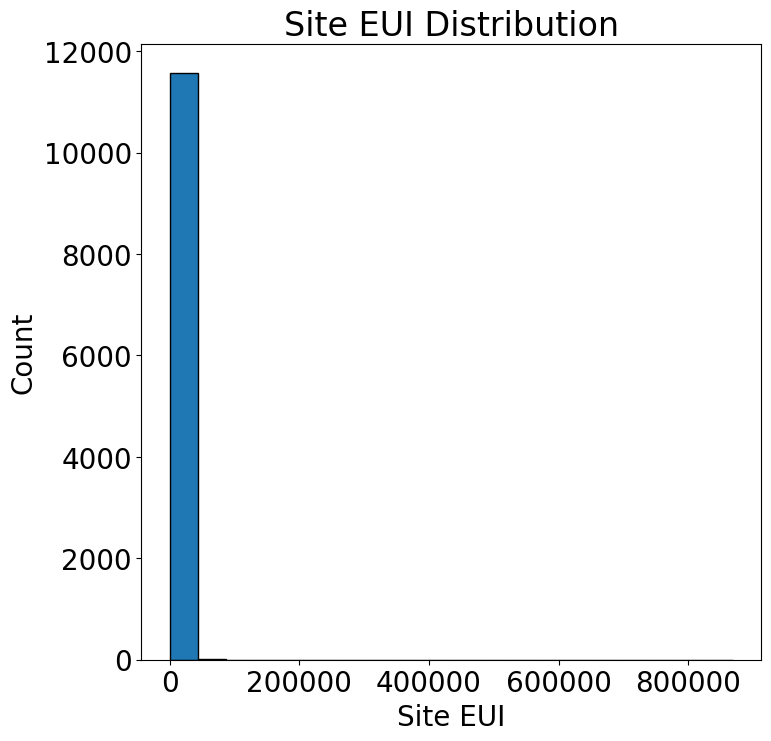

In [50]:
# Histogram Plot of EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count'); plt.title('Site EUI Distribution')

The graph looks very weird.. we found the graph is incredibly skewed... 

In [51]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

From the describtion, we can see the stand deviation is very large. And minimun value is 0 and largest value is too large, indicating that this may be recored wrongly. We can see there are too many outliers!

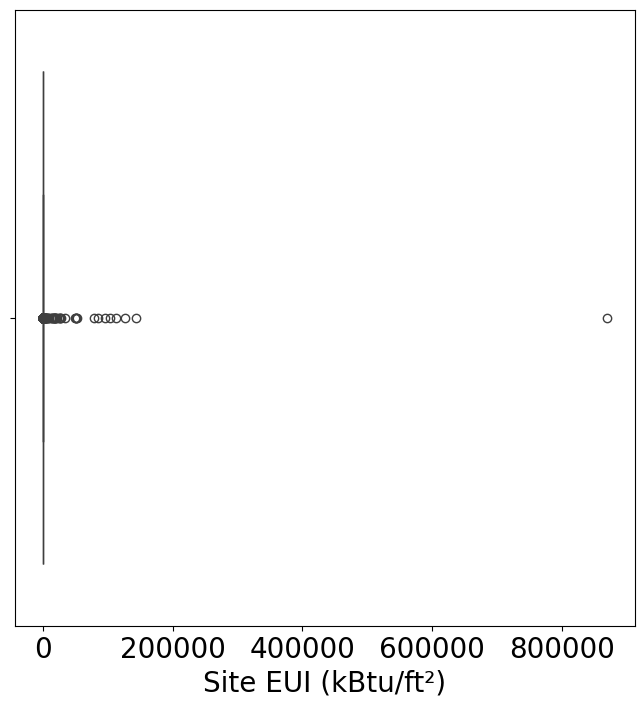

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['Site EUI (kBtu/ft²)'])
plt.show()

The boxplot doesn't look right, indicting too many outliers..

# Outliers handling

After some research, we will try to define our outliers as:

First Quartile - 1.5 * Interquartile Range  

Third Quartile + 1.5 * Interquartile Range


In [53]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 1.5 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 1.5 * iqr))]

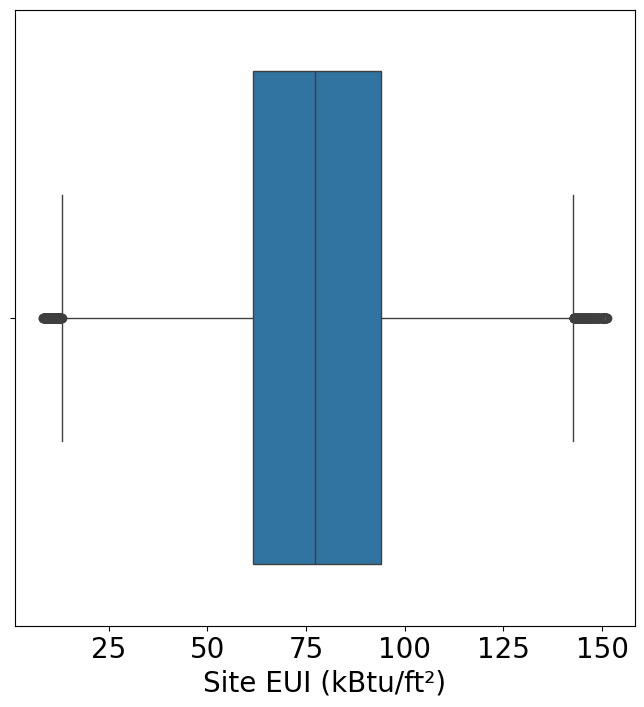

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['Site EUI (kBtu/ft²)'])
plt.show()

Text(0.5, 1.0, 'EUI Distribution')

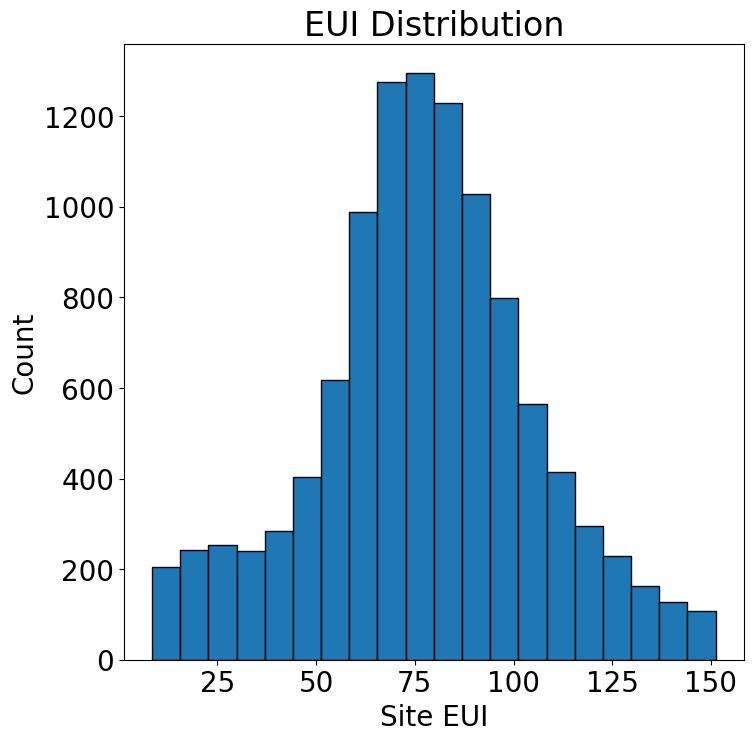

In [55]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('EUI Distribution')

After removing the outliers, we can see the distribution is more like a normal distribution now, and has a positive skew. 

## Looking at Relationships

In order to look at the effect of categorical variables on the score, we can use density plot. It will show the distribution changes based on the variable. And we can try to tell which data has the great impact, 
In order to not mess the plot, we will limit the graph to building types that have more than 100 observations in the dataset. 

In [56]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

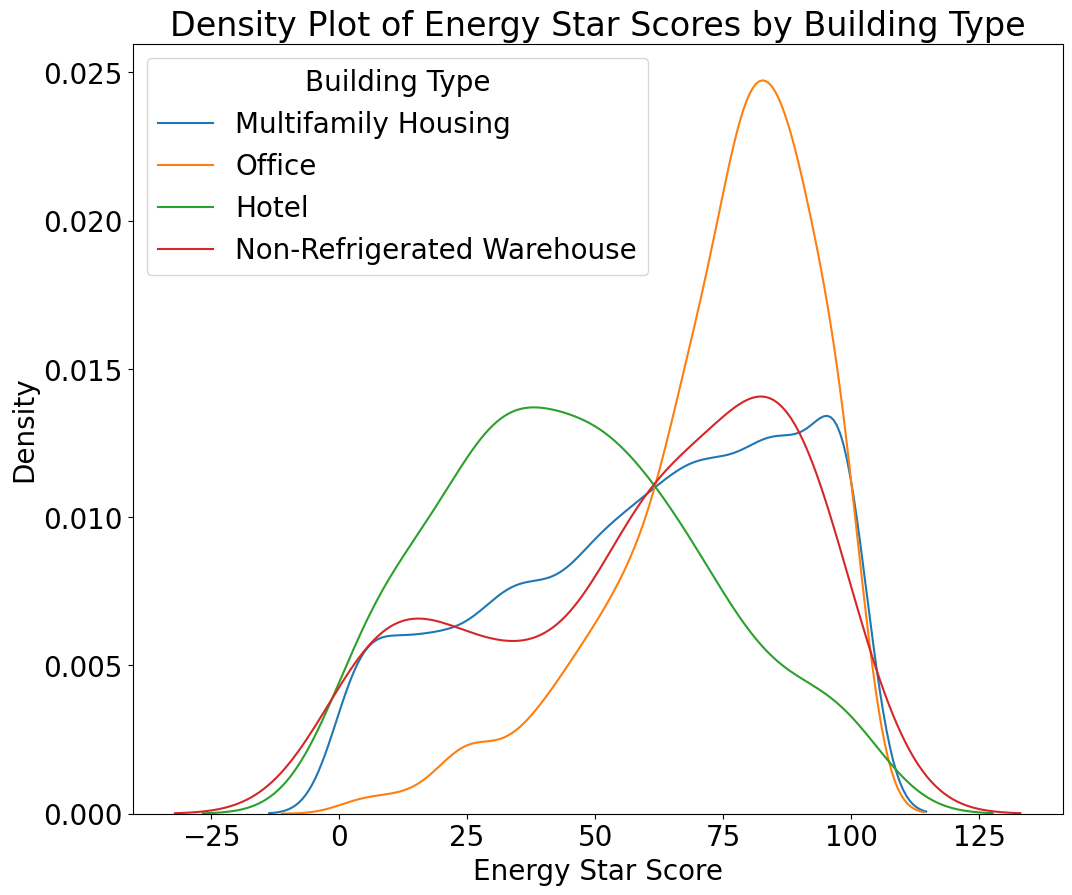

In [57]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(), label = type, fill = False)
    
plt.legend(title='Building Type')
plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Building Type')

From the plot, we can see that the different building type has different impact on the score. Thus, we need to consider the building type into a seperate variable.

We can also try on the boroughs variable.

In [58]:
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

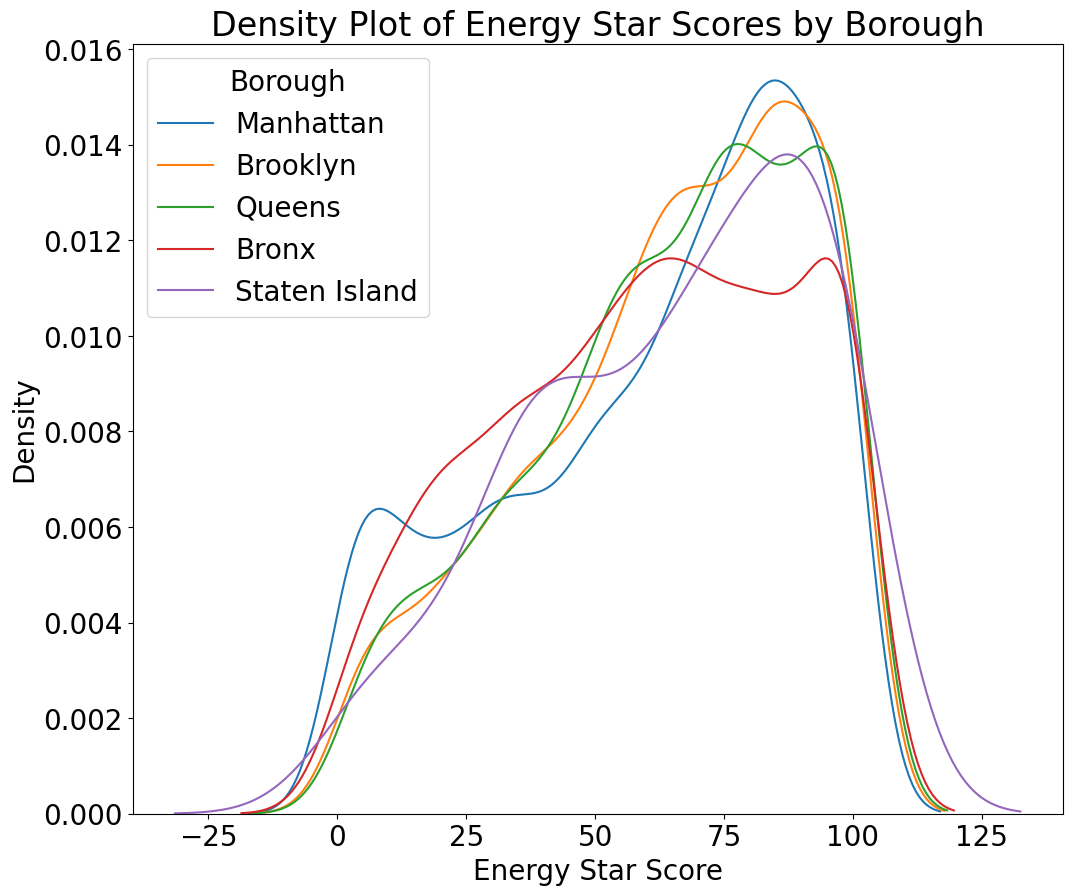

In [59]:
figsize(12, 10)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(), label = borough)
    
plt.legend(title='Borough')
plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Borough')

Borough has very similar impact on the score distribution, thus it make no difference.

## Correlations between Features and Target
Caculate the Pearson correlation coefficient. 

In [60]:
# Find all correlations and sort 
correlations_data = data.corr(numeric_only=True)['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.707467
Weather Normalized Site EUI (kBtu/ft²)                       -0.692744
Weather Normalized Source EUI (kBtu/ft²)                     -0.636276
Source EUI (kBtu/ft²)                                        -0.631850
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.339490
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.300343
Direct GHG Emissions (Metric Tons CO2e)                      -0.171809
Weather Normalized Site Natural Gas Use (therms)             -0.158979
Natural Gas Use (kBtu)                                       -0.156944
Year Built                                                   -0.136194
Total GHG Emissions (Metric Tons CO2e)                       -0.087406
Property Id                                                  -0.048369
Latitude                                                     -0.044027
Longitude                                                    -0.039423
Electr

Site EUI (kBtu/ft²) and Weather Normalized Site EUI (kBtu/ft²) have obvious negative relationship to score. 

We will try log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score.

In [61]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zer

In [62]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.707467
Weather Normalized Site EUI (kBtu/ft²)                         -0.692744
sqrt_Site EUI (kBtu/ft²)                                       -0.682425
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.667331
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.660359
sqrt_Source EUI (kBtu/ft²)                                     -0.658913
log_Source EUI (kBtu/ft²)                                      -0.655700
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.654690
Weather Normalized Source EUI (kBtu/ft²)                       -0.636276
Source EUI (kBtu/ft²)                                          -0.631850
log_Site EUI (kBtu/ft²)                                        -0.631468
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.616748
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.400541
sqrt_Weather Normalized Site Electricity Intensity 

In [63]:
# Display most positive correlations
correlations.tail(15)

log_Largest Property Use Type - Gross Floor Area (ft²)             0.027371
Largest Property Use Type_Supermarket/Grocery Store                0.028057
sqrt_Order                                                         0.035049
Borough_Queens                                                     0.038264
Borough_Brooklyn                                                   0.041000
Order                                                              0.041798
Largest Property Use Type_Hospital (General Medical & Surgical)    0.042655
sqrt_Council District                                              0.053791
log_Council District                                               0.054740
Council District                                                   0.055270
Community Board                                                    0.063283
log_Community Board                                                0.065167
sqrt_Community Board                                               0.066266
Largest Prop

It seems that the transformed features do not show some new faces, and the originally stronger ones remain stronger after the transformation. It is worth mentioning that the category variable one-hot encode becomes the strongest of the positive correlations, although the values are still relatively low.

## Two-Variable Plots

In order to visualize the relationship between two variables, we use a scatterplot. 

Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

<Figure size 1200x600 with 0 Axes>

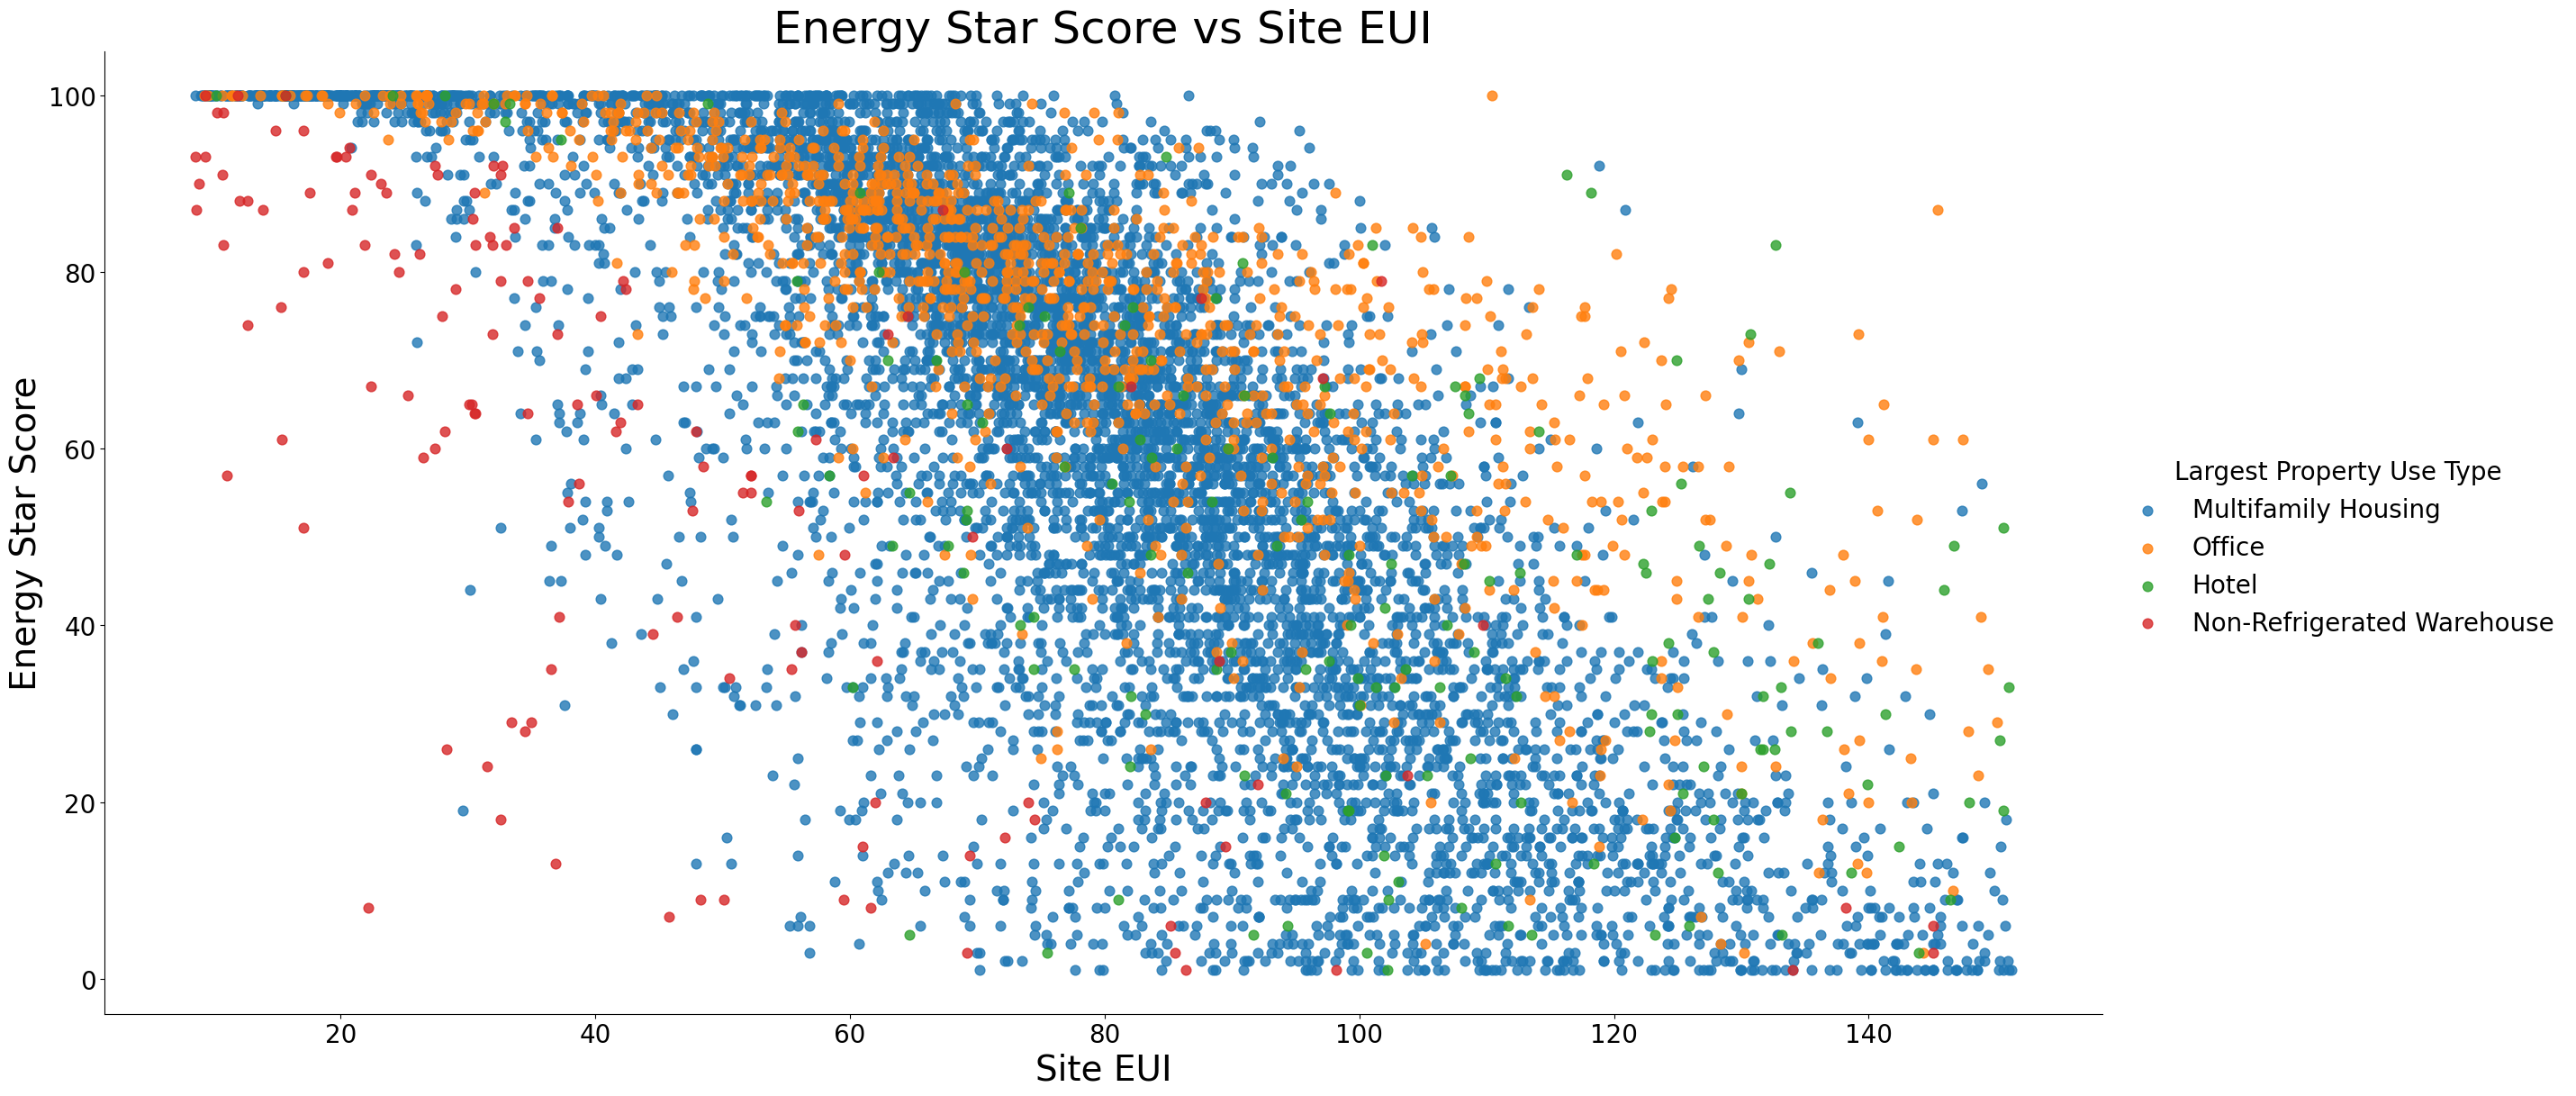

In [64]:
plt.figure(figsize=(12, 6))

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score', 
           hue='Largest Property Use Type', data=features,
           scatter_kws={'alpha': 0.8, 's': 60}, fit_reg=False,
           height=12, aspect=2)


# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

There is a clear negative relationship between the Site EUI and the score.

### Pairs Plot

We can also use pair plot to see the relationship between different variables.



Text(0.5, 1.02, 'Pairs Plot of Energy Data')

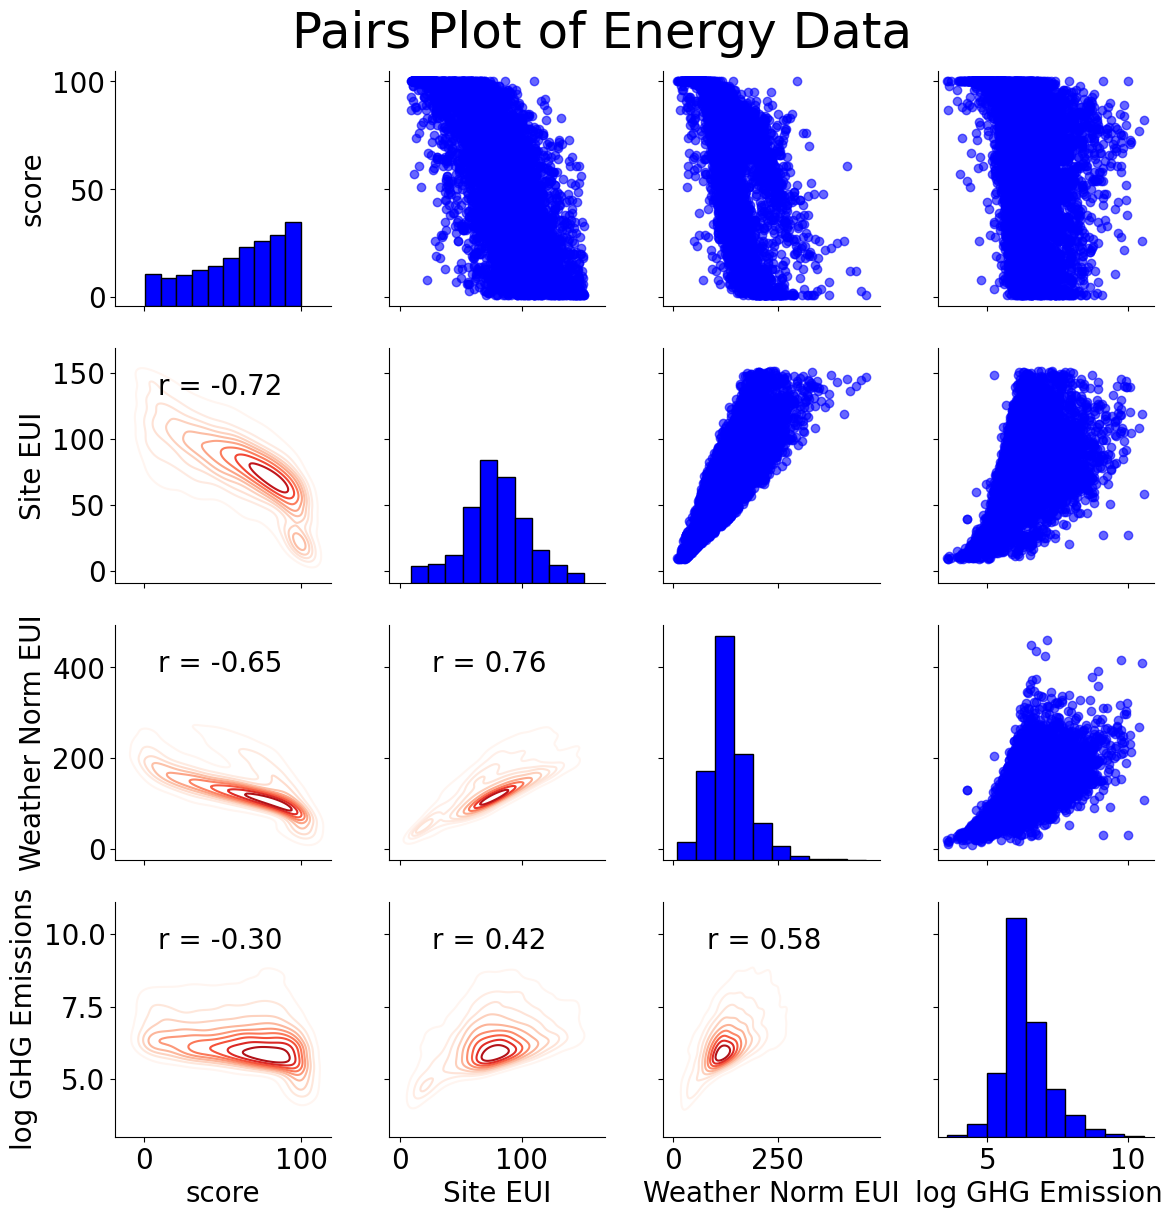

In [65]:
# Extract the columns to  plot

plt.rcParams.update({'font.size': 20}) 
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data=plot_data, height=3)


# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)

To understand the relationships depicted in the plot, we examine the points where the variables of one row meet those of one column. For instance, to explore the relationship between 'score' and the logarithm of GHG Emissions, we identify the 'score' column and locate the row for logarithm of GHG Emissions. At their intersection (in the bottom left plot), there is a correlation coefficient of -0.35 between 'score' and this variable. Observing the top right plot, a scatterplot illustrates this relationship visually.

# Feature Engineering and Selection

Now that we have explored the trends and relationships within the data, we can work on Feature engineering.

In this project, our approach to feature engineering will include:

* Choosing all numerical variables along with two categorical variables: borough and property use type.
* Applying logarithmic transformations to the numerical variables.
* Performing one-hot encoding on the categorical variables.

For feature selection, our strategy will involve:

* Eliminating collinear features.
* Addressing collinearity issues.







The following code selects the numeric features, adds in log transformations of all the numeric features, selects and one-hot encodes the categorical features, and joins the sets of features together. 

In [66]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zee/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zer

(10766, 109)

Currently, our dataset consists of 10,766 observations (buildings) and 109 distinct features, including one column designated for the score. It's probable that not all of these features are critical for predicting the score, and many may be redundant due to high correlation. We will address this issue of redundancy in the following sections.

## Remove Collinear Features


Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9958')

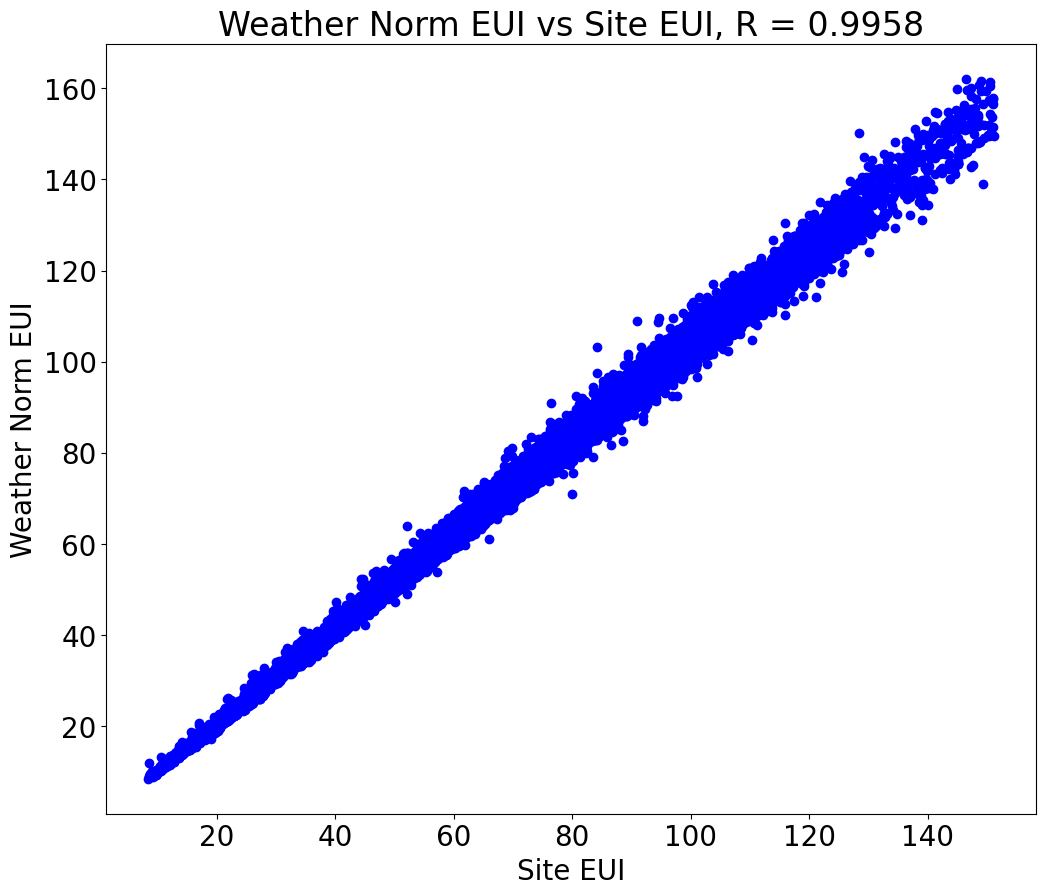

In [67]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])


Remove collineare features, adapted it from [Stack Overflow](https://stackoverflow.com/a/43104383)

In [68]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [69]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6)

In [70]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(10766, 65)

We now have only 65 features left!

# Split Into Training and Testing Sets



In [71]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1695, 65)
(9071, 65)


In [72]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6349, 64)
(2722, 64)
(6349, 1)
(2722, 1)


# Establish a Baseline 

In [73]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Now we can use median as our baseline model/

In [74]:
baseline = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline))


The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 23.0849


This indicates that our average prediction error on the test set is approximately 25 points. Considering that the scores range from 1 to 100, this translates to an average error of about 25% using a simple method. Using the median value from the training data as a naive guess sets a modest baseline for our model.

# Save the dataset.

In [75]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)